In [ ]:
# Python analysis of whats app chat with my best friend

In [39]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
import re

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords

import string

[nltk_data] Downloading package punkt to /Users/danatok/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [42]:
cd whatsapp-wordclouds-master/

/Users/danatok/Downloads/whatsapp-wordclouds-master


In [43]:
import pandas as pd
df = pd.read_csv('katya.csv', skiprows = 0, low_memory = False)

In [44]:
df

Katya M 🎃  \
0     Katya M 🎃   
1          datm   
2     Katya M 🎃   
3     Katya M 🎃   
4     Katya M 🎃   
...         ...   
8506       datm   
8507  Katya M 🎃   
8508  Katya M 🎃   
8509  Katya M 🎃   
8510       datm   

     ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.  \
0                                   Фуууууу не приезжай                                                                          
1                                        ‎image omitted                                                                          
2                                                  Ееее                                                                          
3                                          В честь меня                                                                          
4                                           Как приятно                                                                          
...                                                 ...                                                                          
8506                                      Делать нечего                                                                          
8507                  А у меня какие частые выражения ?                                                                          
8508                    Кажется там что то депрессивное                                                                          
8509                                          Сто пудов                                                                          
8510                             да я щас попробую твой                                                                          

     Unnamed: 2 Unnamed: 3  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
8506          )        NaN  
8507        NaN        NaN  
8508        NaN        NaN  
8509        NaN        NaN  
8510        NaN        NaN  

[8511 rows x 4 columns]

In [45]:
df = df.dropna(thresh=int(df.shape[0] * .6), axis=1)# drop any column with less than 90% non-NA values.

In [46]:
df.columns = ['name', 'msgs'] # renaming columns

In [47]:
df = df[df['msgs'] != '‎this message was deleted.']
df = df[df['msgs'] != '‎sticker omitted']
df = df[df['msgs'] != '‎ this message was deleted']
df = df[df['msgs'] != '‎image omitted']
df = df[df['msgs'] != 'https'] 
df = df[df['msgs'] != '‎video omitted']
df = df[df['msgs'] != '‎audio omitted']




#df = df.reset_index()

In [56]:
df['msgs'] = df['msgs'].apply(lambda x: str(x).lower())



In [48]:
df = df.reset_index(drop = True)

In [49]:
df

name                               msgs
0     Katya M 🎃                Фуууууу не приезжай
1     Katya M 🎃                               Ееее
2     Katya M 🎃                       В честь меня
3     Katya M 🎃                        Как приятно
4     Katya M 🎃         Фотошоп вообще беспалевный
...         ...                                ...
7666       datm                      Делать нечего
7667  Katya M 🎃  А у меня какие частые выражения ?
7668  Katya M 🎃    Кажется там что то депрессивное
7669  Katya M 🎃                          Сто пудов
7670       datm             да я щас попробую твой

[7671 rows x 2 columns]

In [50]:
df['name'].value_counts().head(30)

Katya M 🎃    3976
datm         3612
Name: name, dtype: int64

In [57]:
abz = df[df['name'] == 'datm']

abz = abz.reset_index(drop = True)

Stop words
If we now look at our most common words we have what are known as "stop words" in NLP. These are commonly used words that are considered unimportant to the content of a message. Think words like "and, to,I". These are considered important in a lot of Natural Language Processing now, but they make for rubbish word clouds. NLTK can help us here.


In [53]:
#!pip install pymystem3

In [58]:
import nltk
nltk.download("stopwords")
#--------#

from nltk.corpus import stopwords
from string import punctuation
from pymystem3 import Mystem

#Create lemmatizer and stopwords list
mystem = Mystem() 
russian_stopwords = stopwords.words("russian")

words = ['это', ')', '(', '...', '\'' ]
russian_stopwords = russian_stopwords + words
#Preprocess function
def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in punctuation]
    
    text = " ".join(tokens)
    
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danatok/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
abz['message_without_stopwords'] = abz['msgs'].apply(preprocess_text)



In [31]:
#abz['msgs'].value_counts().head(30)
abz['message_without_stopwords'].value_counts().head(40)

               203
ахахах          48
знать           31
🤣 🤣 🤣 🤣         24
🤣 🤣 🤣           22
ема             21
ахах            15
класс           13
уахахах         13
капец           12
)))\n           11
блин            11
тема            11
🤣               10
боже             9
прикольно        9
ееее             8
видеть           8
🤣 🤣 🤣 🤣 🤣        8
говорить         8
смотреть         8
че               7
спасибо          7
ждать            7
давать           7
прямой           6
писать           6
норма            6
ладно            6
поздравлять      6
понимать         6
дура             6
классно          6
молодец          6
сказать          6
ой               5
аааа             5
ооо              5
человек          5
ого              5
Name: message_without_stopwords, dtype: int64

In [60]:
#pip install wordcloud

In [95]:
corpus = abz['message_without_stopwords'] 
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
#remove stop words
lst_tokens = [word.lower() for word in lst_tokens if word not in 
                    russian_stopwords]
lst_tokens = re.sub(r'[^\w\s]', '', str(lst_tokens).strip())
lst_tokens = lst_tokens.split()

In [98]:
lst_tokens

['ахи',
 'балтика',
 'квин',
 'скоро',
 'ya',
 'tebya',
 'lublu',
 'nan',
 'nan',
 'ya',
 'spala',
 'kapec',
 'dolgo',
 'tvoi',
 'rodstvenniki',
 'четвеиег',
 'уезжать',
 'вабщемало',
 'кад',
 'хотеть',
 'выходить',
 'nan',
 'одеваться',
 'спасибо',
 'огромный',
 'саганчик',
 'пончик',
 'лббоб',
 'вабщк',
 'поидея',
 'вчего',
 'уставать',
 'аууу',
 'ааа',
 'ой',
 'чета',
 'понимать',
 'сперва',
 'ща',
 'ток',
 'думать',
 'ңати',
 'п',
 'парень',
 'шок',
 'уу',
 'май',
 'подруга',
 'аида',
 'плиз',
 'срочно',
 'чк',
 'попадать',
 'отвечать',
 'аида',
 'гадать',
 'таро',
 'ия',
 'хэйдур',
 'сколько',
 'такси',
 'стоять',
 'ореньуг',
 'оренбург',
 'актобе',
 'спасибо',
 'скошько',
 'час',
 'сколько',
 'автобус',
 'кризис',
 'экономика',
 'сымбат',
 'белый',
 'пакет',
 'любой',
 'кртзис',
 'называть',
 'белый',
 'пакет',
 'тип',
 'вчера',
 'получать',
 'практика',
 'проф',
 'оплачивать',
 'вроде',
 'ооо',
 'круто',
 'актобе',
 'эта',
 'оо',
 'похожж',
 'вау',
 'ема',
 'ребенок',
 'целый',


In [100]:


fig, ax = plt.subplots(figsize=(17, 8), nrows=1, ncols=2)
fig.suptitle("Most frequent words for datm", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:20,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:20,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

In [156]:
#pip install wordcloud

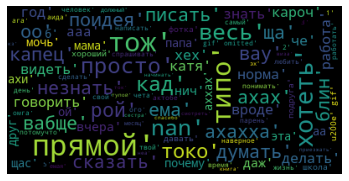

In [101]:
import wordcloud
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(str(lst_tokens))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

# Galym ATptp 🎃

In [164]:
df

name                                        msgs
0                          datm                                  zhrat v 12
1      ‎You added Naurinrino 🎅🏿                                         nan
2                          datm                                  kuwat v 12
3                Nurba Goblin 💍              для этого у нас та группа есть
4                 Galym ATptp 🎃                                      тупой)
...                         ...                                         ...
37633         Moldir Pridurok 🌝                                   gde zooms
37634         Moldir Pridurok 🌝                            ainalasy rozovyy
37635         Moldir Pridurok 🌝  i pesnya ta ra ra raa raa raam, spokoinaya
37636         Moldir Pridurok 🌝                               kto pomnit? 😅
37637         Abzal Robobrat 🎅🏿                               404 not found

[33320 rows x 2 columns]

In [245]:
gal = df[df['name'] == 'Galym ATptp 🎃']

gal
gal['message_without_stopwords'] = gal['msgs'].apply(preprocess_text)
gal = gal[gal['msgs'] != 'https']
gal['message_without_stopwords'].value_counts()


<ipython-input-245-0c385872af55>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gal['message_without_stopwords'] = gal['msgs'].apply(preprocess_text)


                             236
лола                          63
😂                             56
ахах                          44
ахи                           43
                            ... 
97.3                           1
show bobs                      1
молодой                        1
собираться мочь                1
лицо алишер прямой кстати      1
Name: message_without_stopwords, Length: 3427, dtype: int64

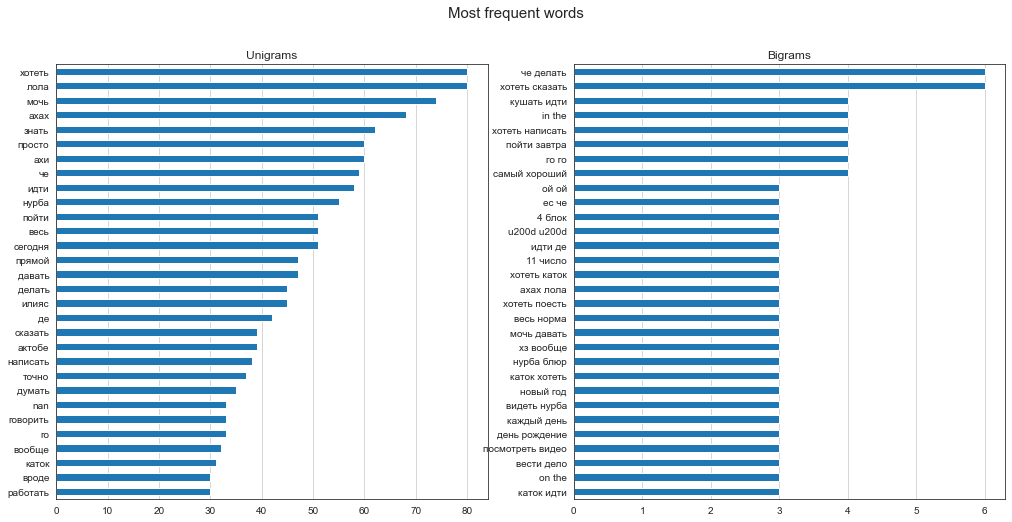

In [247]:
#corpus = df_notnull[df_notnull['NPS Suositteluarvosana'] < 5]['Why do not you recommend fluid ...?']
corpus = gal['message_without_stopwords'] 
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
#remove stop words
lst_tokens = [word.lower() for word in lst_tokens if word not in 
                    russian_stopwords]
lst_tokens = re.sub(r'[^\w\s]', '', str(lst_tokens).strip())
lst_tokens = lst_tokens.split()

fig, ax = plt.subplots(figsize=(17, 8), nrows=1, ncols=2)
fig.suptitle("Most frequent words", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:30,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:30,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

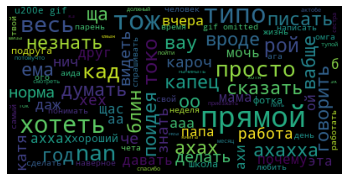

In [102]:
import wordcloud
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(" ".join(lst_tokens))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [ ]:
# moldir

In [258]:
gal = df[df['name'] == 'Moldir Pridurok 🌝']

gal
gal['message_without_stopwords'] = gal['msgs'].apply(preprocess_text)
gal = gal[gal['msgs'] != 'https']
gal['message_without_stopwords'].value_counts()



<ipython-input-258-0a9081cdb186>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gal['message_without_stopwords'] = gal['msgs'].apply(preprocess_text)


📷                                              108
                                                39
disn                                            19
📷 📷                                             18
😂                                               18
                                              ... 
kudai kalasa letom                               1
my s naurom v kupe ewe tut roommateka aizat      1
ne do tupyh wutok                                1
друг                                             1
vyhoju iz doma                                   1
Name: message_without_stopwords, Length: 2701, dtype: int64

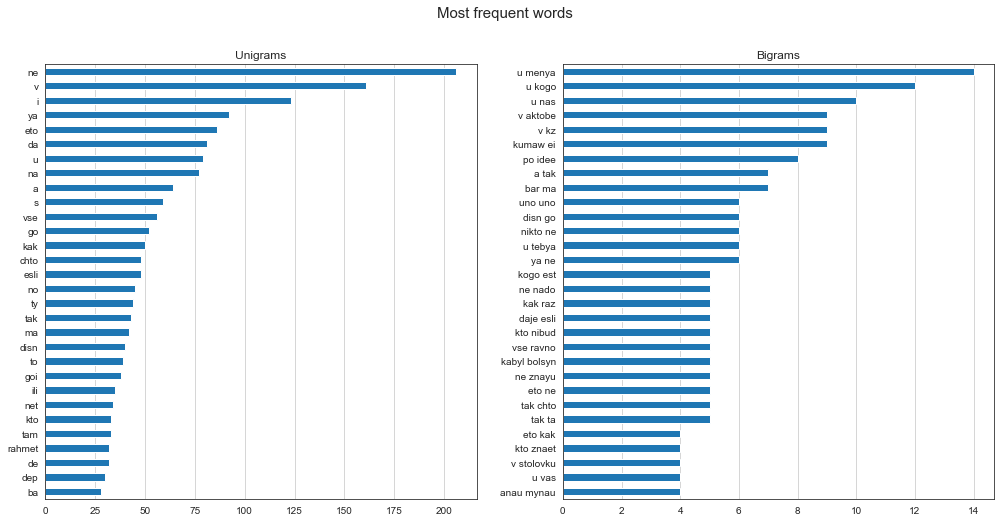

In [259]:
#corpus = df_notnull[df_notnull['NPS Suositteluarvosana'] < 5]['Why do not you recommend fluid ...?']
corpus = gal['message_without_stopwords'] 
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
#remove stop words
lst_tokens = [word.lower() for word in lst_tokens if word not in 
                    russian_stopwords]
lst_tokens = re.sub(r'[^\w\s]', '', str(lst_tokens).strip())
lst_tokens = lst_tokens.split()

fig, ax = plt.subplots(figsize=(17, 8), nrows=1, ncols=2)
fig.suptitle("Most frequent words", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:30,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:30,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

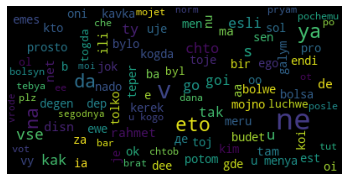

In [260]:
import wordcloud
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(" ".join(lst_tokens))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [ ]:
# Generating the wordcloud with the values under the category dataframe
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(fourth_topic_words))
plt.imshow(cloud)
plt.axis('off')
plt.show()

# Dana Kavk

In [262]:
gal = df[df['name'] == 'Dana Kavk 💍']

gal
gal['message_without_stopwords'] = gal['msgs'].apply(preprocess_text)
gal = gal[gal['msgs'] != 'https']
gal['message_without_stopwords'].value_counts()




<ipython-input-262-55eedf4c22dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gal['message_without_stopwords'] = gal['msgs'].apply(preprocess_text)


                           68
давать                      8
эээ                         4
nan                         4
идти                        4
                           ..
шалый опережать             1
зп жок                      1
palehche                    1
chto bylo v proshl godu     1
77712965127 заметка         1
Name: message_without_stopwords, Length: 1239, dtype: int64

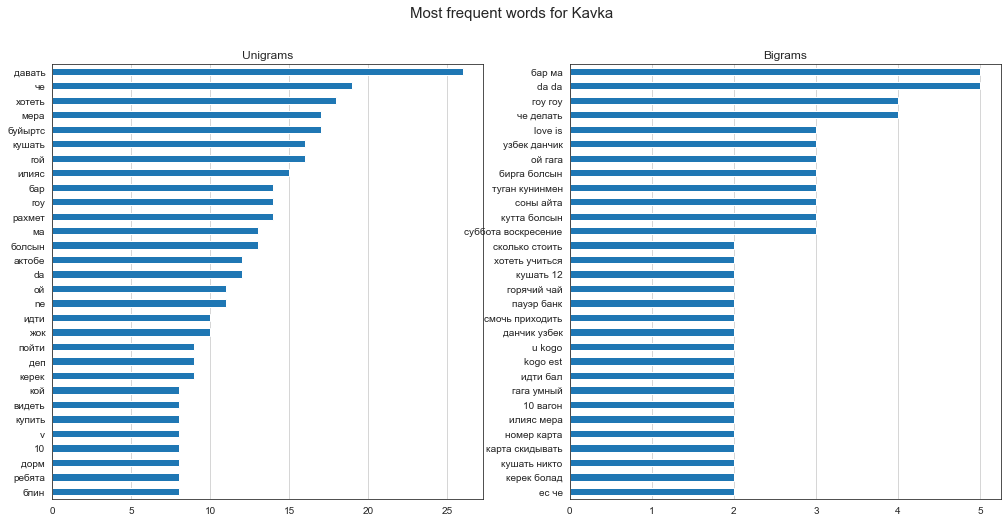

In [263]:
#corpus = df_notnull[df_notnull['NPS Suositteluarvosana'] < 5]['Why do not you recommend fluid ...?']
corpus = gal['message_without_stopwords'] 
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
#remove stop words
lst_tokens = [word.lower() for word in lst_tokens if word not in 
                    russian_stopwords]
lst_tokens = re.sub(r'[^\w\s]', '', str(lst_tokens).strip())
lst_tokens = lst_tokens.split()

fig, ax = plt.subplots(figsize=(17, 8), nrows=1, ncols=2)
fig.suptitle("Most frequent words for Kavka", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:30,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:30,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

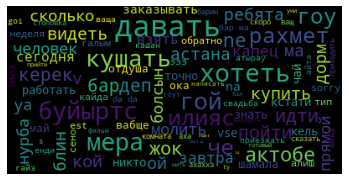

In [257]:
import wordcloud
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(" ".join(lst_tokens))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [264]:
# meru
gal = df[df['name'] == 'Meru Gor 💍']

gal
gal['message_without_stopwords'] = gal['msgs'].apply(preprocess_text)
gal = gal[gal['msgs'] != 'https']
gal['message_without_stopwords'].value_counts()





<ipython-input-264-3d10a8b8452d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gal['message_without_stopwords'] = gal['msgs'].apply(preprocess_text)


                                57
😂                               19
😅                               15
++\n                            13
nan                              8
                                ..
гоу 7                            1
папа запирать дома 😂             1
всмысл ладно мера                1
woman power in petroleum dee     1
город 9 смочь                    1
Name: message_without_stopwords, Length: 917, dtype: int64

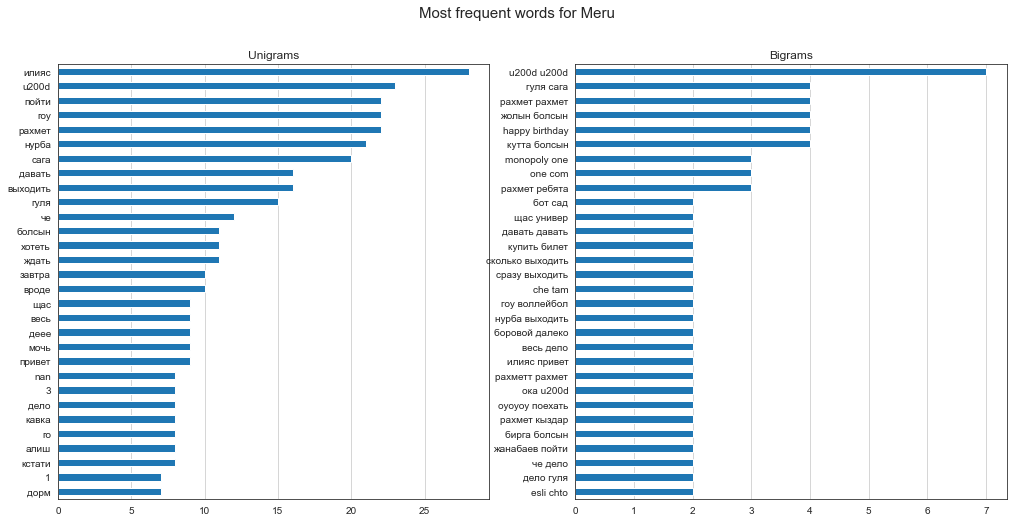

In [267]:
#corpus = df_notnull[df_notnull['NPS Suositteluarvosana'] < 5]['Why do not you recommend fluid ...?']
corpus = gal['message_without_stopwords'] 
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
#remove stop words
lst_tokens = [word.lower() for word in lst_tokens if word not in 
                    russian_stopwords]
lst_tokens = re.sub(r'[^\w\s]', '', str(lst_tokens).strip())
lst_tokens = lst_tokens.split()

fig, ax = plt.subplots(figsize=(17, 8), nrows=1, ncols=2)
fig.suptitle("Most frequent words for Meru", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:30,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:30,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

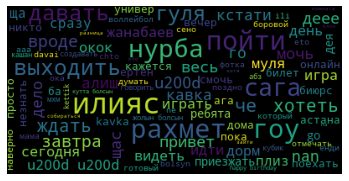

In [266]:
import wordcloud
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(" ".join(lst_tokens))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [ ]:
# Gulya

In [291]:
gal = df[df['name'] == 'Gul\'naz Girdraffe 💍']

gal
gal['message_without_stopwords'] = gal['msgs'].apply(preprocess_text)
gal = gal[gal['msgs'] != 'https']
gal = gal[gal['msgs'] != 'u200e']
gal['message_without_stopwords'].value_counts().head(40)





<ipython-input-291-7a6b02c55958>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gal['message_without_stopwords'] = gal['msgs'].apply(preprocess_text)


            156
😂           111
ахах         44
ахи          34
ока          23
де           22
😂 😂 😂        20
че           14
аа           13
))\n          9
уахах         9
спасибо       8
эх            8
знать         8
ема           8
уоу           7
капец         7
🥴             7
давать        7
😍 😍 😍         6
гоу           6
понимать      6
😅             6
мочь          6
👍 🏻           6
+++\n         6
аа ока        5
😢             5
блин          5
е             5
пойти         5
??            5
🤣             4
завтра        4
алиш          4
ага           4
аха           4
еее           4
уаха          4
универ        4
Name: message_without_stopwords, dtype: int64

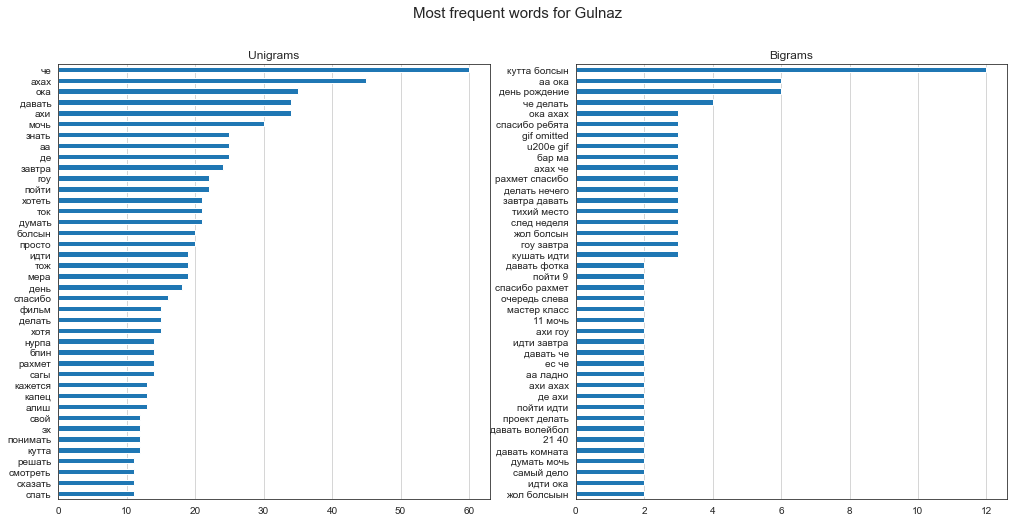

In [293]:
#corpus = df_notnull[df_notnull['NPS Suositteluarvosana'] < 5]['Why do not you recommend fluid ...?']
corpus = gal['message_without_stopwords'] 
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
#remove stop words
lst_tokens = [word.lower() for word in lst_tokens if word not in 
                    russian_stopwords]
lst_tokens = re.sub(r'[^\w\s]', '', str(lst_tokens).strip())
lst_tokens = lst_tokens.split()

fig, ax = plt.subplots(figsize=(17, 8), nrows=1, ncols=2)
fig.suptitle("Most frequent words for Gulnaz", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:40,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:40,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

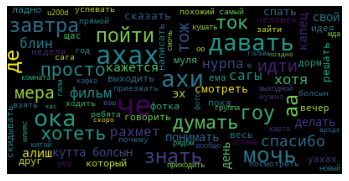

In [294]:
import wordcloud
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(" ".join(lst_tokens))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [ ]:
# all

In [277]:
#df['message_without_stopwords'].value_counts()



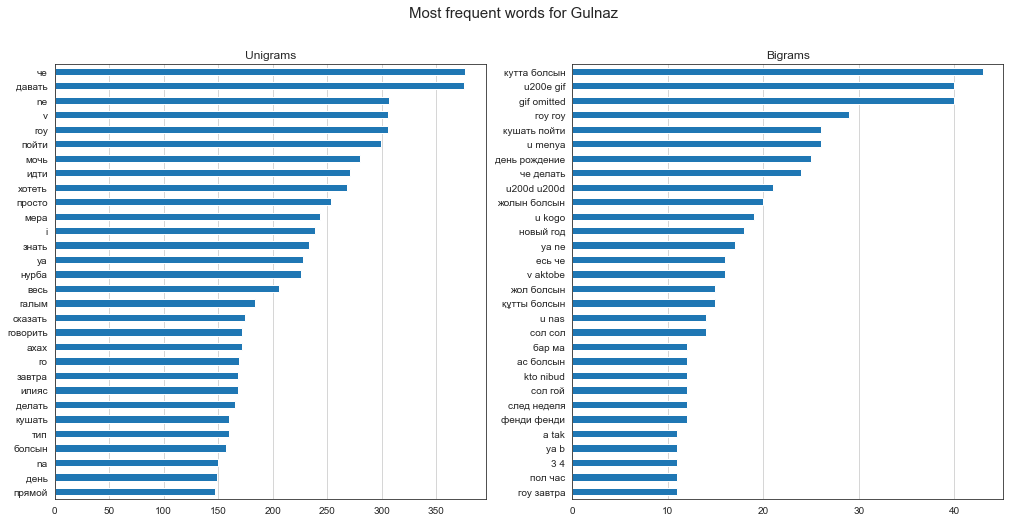

In [278]:
df['message_without_stopwords'] = df['msgs'].apply(preprocess_text)
df = df[df['msgs'] != 'https']
df = df[df['msgs'] != 'nan']
#corpus = df_notnull[df_notnull['NPS Suositteluarvosana'] < 5]['Why do not you recommend fluid ...?']
corpus = df['message_without_stopwords'] 
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
#remove stop words
lst_tokens = [word.lower() for word in lst_tokens if word not in 
                    russian_stopwords]
lst_tokens = re.sub(r'[^\w\s]', '', str(lst_tokens).strip())
lst_tokens = lst_tokens.split()

fig, ax = plt.subplots(figsize=(17, 8), nrows=1, ncols=2)
fig.suptitle("Most frequent words for Gulnaz", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:30,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:30,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

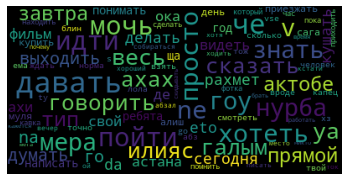

In [279]:
import wordcloud
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(" ".join(lst_tokens))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [ ]:
# nurba

In [295]:
gal = df[df['name'] == 'Nurba Goblin 💍']

gal
gal['message_without_stopwords'] = gal['msgs'].apply(preprocess_text)
gal = gal[gal['msgs'] != 'https']
gal['message_without_stopwords'].value_counts()





<ipython-input-295-3a92b5100f14>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gal['message_without_stopwords'] = gal['msgs'].apply(preprocess_text)


                          205
ваха                       26
хз                         21
аха                        20
неа                        19
                         ... 
улица охрененный запах      1
набор юный алкоголик        1
100к                        1
ручка                       1
сындыр                      1
Name: message_without_stopwords, Length: 3379, dtype: int64

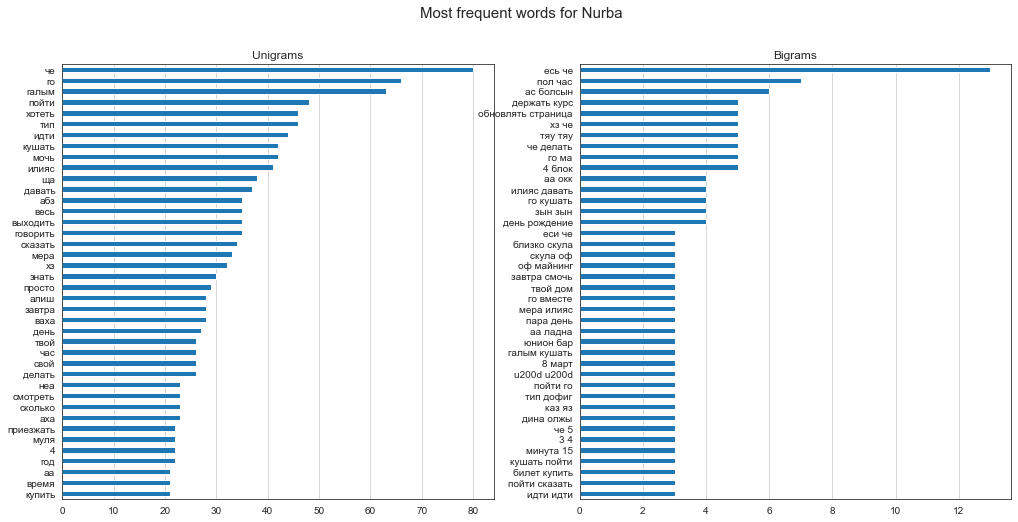

In [298]:
#corpus = df_notnull[df_notnull['NPS Suositteluarvosana'] < 5]['Why do not you recommend fluid ...?']
corpus = gal['message_without_stopwords'] 
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
#remove stop words
lst_tokens = [word.lower() for word in lst_tokens if word not in 
                    russian_stopwords]
lst_tokens = re.sub(r'[^\w\s]', '', str(lst_tokens).strip())
lst_tokens = lst_tokens.split()

fig, ax = plt.subplots(figsize=(17, 8), nrows=1, ncols=2)
fig.suptitle("Most frequent words for Nurba", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:40,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:40,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

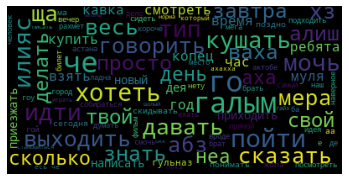

In [299]:
import wordcloud
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(" ".join(lst_tokens))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [301]:
# saga
gal = df[df['name'] == 'Sagy Petite 💍 новый номер']

gal
gal['message_without_stopwords'] = gal['msgs'].apply(preprocess_text)
gal = gal[gal['msgs'] != 'https']
gal['message_without_stopwords'].value_counts()



#corpus = df_notnull[df_notnull['NPS Suositteluarvosana'] < 5]['Why do not you recommend fluid ...?']
corpus = gal['message_without_stopwords'] 
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
#remove stop words
lst_tokens = [word.lower() for word in lst_tokens if word not in 
                    russian_stopwords]
lst_tokens = re.sub(r'[^\w\s]', '', str(lst_tokens).strip())
lst_tokens = lst_tokens.split()

fig, ax = plt.subplots(figsize=(17, 8), nrows=1, ncols=2)
fig.suptitle("Most frequent words for Saga", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:40,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:40,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()


<ipython-input-301-342986335696>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gal['message_without_stopwords'] = gal['msgs'].apply(preprocess_text)


In [302]:
import wordcloud
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(" ".join(lst_tokens))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [304]:
#alish
gal = df[df['name'] == 'Alisha Keys 🎅🏿']

gal
gal['message_without_stopwords'] = gal['msgs'].apply(preprocess_text)
gal = gal[gal['msgs'] != 'https']
gal['message_without_stopwords'].value_counts()


#corpus = df_notnull[df_notnull['NPS Suositteluarvosana'] < 5]['Why do not you recommend fluid ...?']
corpus = gal['message_without_stopwords'] 
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
#remove stop words
lst_tokens = [word.lower() for word in lst_tokens if word not in 
                    russian_stopwords]
lst_tokens = re.sub(r'[^\w\s]', '', str(lst_tokens).strip())
lst_tokens = lst_tokens.split()

fig, ax = plt.subplots(figsize=(17, 8), nrows=1, ncols=2)
fig.suptitle("Most frequent words for Alish", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:40,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:40,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()



<ipython-input-304-a383f4222da1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gal['message_without_stopwords'] = gal['msgs'].apply(preprocess_text)


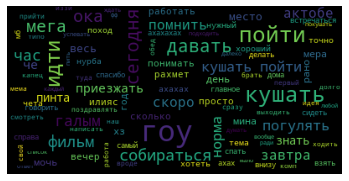

In [305]:
import wordcloud
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(" ".join(lst_tokens))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [ ]:
Ilias 💂🏽 Wal                                                                                        2305
Gul'naz Girdraffe 💍                                                                                 2264
Alisha Keys 🎅🏿                                                                                      1575
Dana Kavk 💍                                                                                         1391
Meru Gor 💍                                                                                          1175
Sagy Petite 💍 новый номер

<ipython-input-307-c3a0792e59dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gal['message_without_stopwords'] = gal['msgs'].apply(preprocess_text)


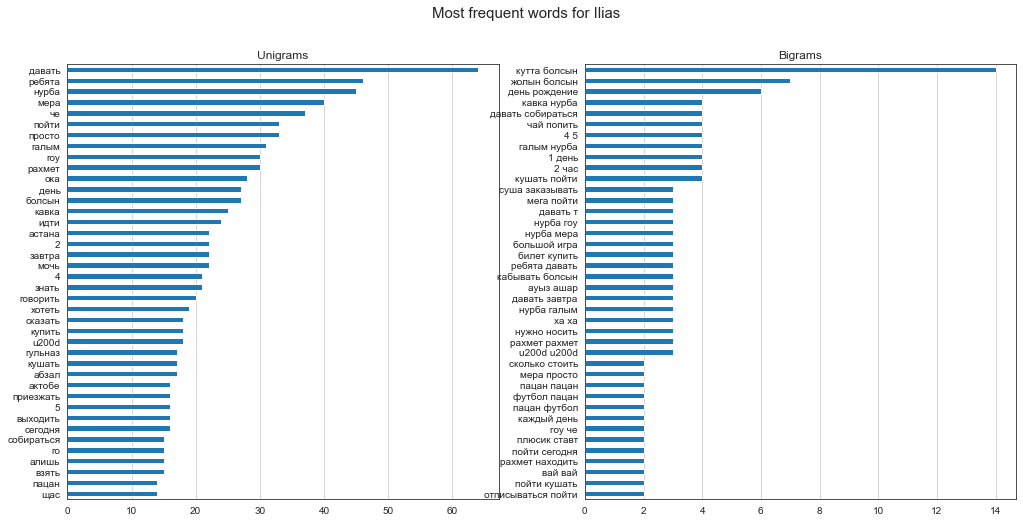

In [307]:
# ilias
gal = df[df['name'] == 'Ilias 💂🏽 Wal']

gal
gal['message_without_stopwords'] = gal['msgs'].apply(preprocess_text)
gal = gal[gal['msgs'] != 'https']
gal['message_without_stopwords'].value_counts()



#corpus = df_notnull[df_notnull['NPS Suositteluarvosana'] < 5]['Why do not you recommend fluid ...?']
corpus = gal['message_without_stopwords'] 
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
#remove stop words
lst_tokens = [word.lower() for word in lst_tokens if word not in 
                    russian_stopwords]
lst_tokens = re.sub(r'[^\w\s]', '', str(lst_tokens).strip())
lst_tokens = lst_tokens.split()

fig, ax = plt.subplots(figsize=(17, 8), nrows=1, ncols=2)
fig.suptitle("Most frequent words for Ilias", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:40,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:40,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()


In [ ]:
# naur Naurinrino 🎅🏿

<ipython-input-310-282081c73bf6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gal['message_without_stopwords'] = gal['msgs'].apply(preprocess_text)


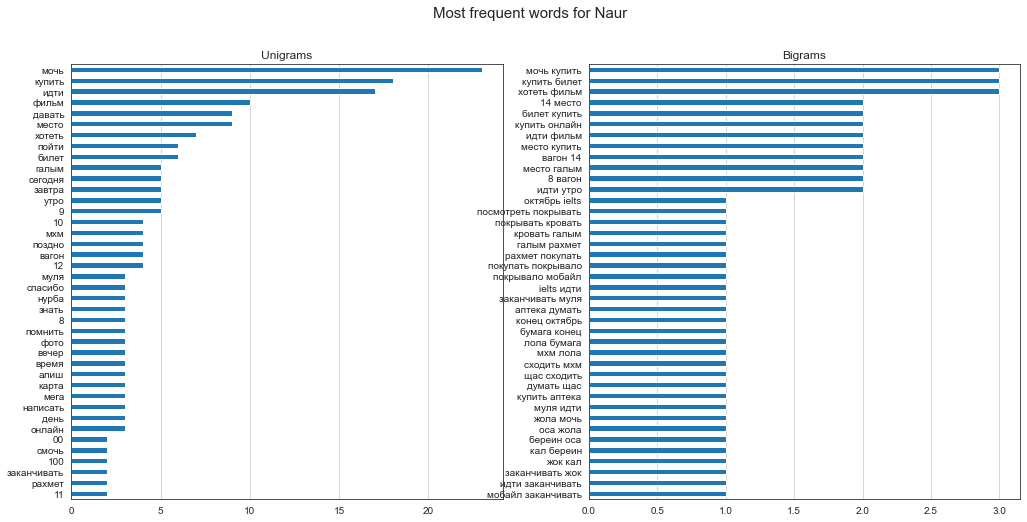

In [310]:
# ilias
gal = df[df['name'] == 'Naurinrino 🎅🏿']

gal
gal['message_without_stopwords'] = gal['msgs'].apply(preprocess_text)
gal = gal[gal['msgs'] != 'https']
gal['message_without_stopwords'].value_counts()



#corpus = df_notnull[df_notnull['NPS Suositteluarvosana'] < 5]['Why do not you recommend fluid ...?']
corpus = gal['message_without_stopwords'] 
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
#remove stop words
lst_tokens = [word.lower() for word in lst_tokens if word not in 
                    russian_stopwords]
lst_tokens = re.sub(r'[^\w\s]', '', str(lst_tokens).strip())
lst_tokens = lst_tokens.split()

fig, ax = plt.subplots(figsize=(17, 8), nrows=1, ncols=2)
fig.suptitle("Most frequent words for Naur", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:40,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:40,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()



In [ ]:
#datm

<ipython-input-324-5fee7d4ebc90>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gal['message_without_stopwords'] = gal['msgs'].apply(preprocess_text)


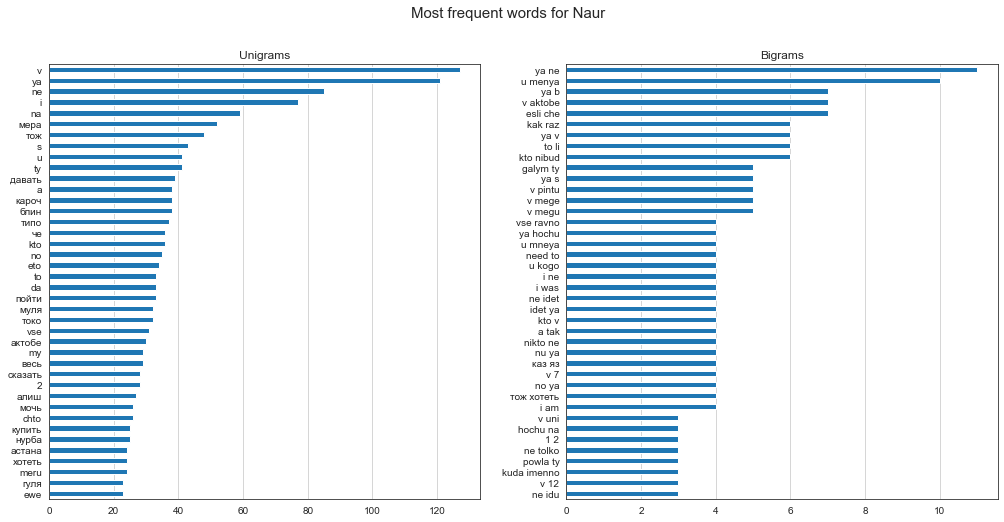

In [324]:
# ilias
gal = df[df['name'] == 'datm']

gal
gal['message_without_stopwords'] = gal['msgs'].apply(preprocess_text)
gal = gal[gal['msgs'] != 'https']
gal = gal[gal['msgs'] != '‎ gif omitted']
gal = gal[gal['msgs'] != '‎ you deleted this message']
gal = gal[gal['msgs'] != '‎you deleted this message.']
gal = gal[gal['msgs'] != '‎gif omitted']

gal['message_without_stopwords'].value_counts()



#corpus = df_notnull[df_notnull['NPS Suositteluarvosana'] < 5]['Why do not you recommend fluid ...?']
corpus = gal['message_without_stopwords'] 
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
#remove stop words
lst_tokens = [word.lower() for word in lst_tokens if word not in 
                    russian_stopwords]
lst_tokens = re.sub(r'[^\w\s]', '', str(lst_tokens).strip())
lst_tokens = lst_tokens.split()

fig, ax = plt.subplots(figsize=(17, 8), nrows=1, ncols=2)
fig.suptitle("Most frequent words for Naur", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:40,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:40,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()




In [325]:
gal['msgs'].value_counts().head(20)

da        17
да        14
ема       11
блин       8
ахахха     6
okei       6
еее        6
?          5
oi         5
гуля       5
neznau     5
нет        5
-          5
ахахах     5
емае       5
ok         5
вау        5
муля       5
ой         4
net        4
Name: msgs, dtype: int64

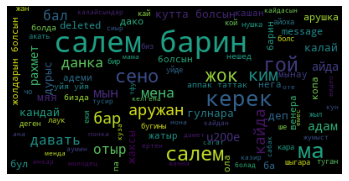

In [35]:
import wordcloud
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(" ".join(lst_tokens))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()